In [9]:
# Importamos pandas y otras bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/TelecomX.csv')
df.head()

,customerID,Churn,Genero,Mayor a 65 Años,Casad@,Dependientes,Tiempo de cliente,Servicio de telefonia,Multiples lineas,Servicio de Internet,...,Proteccion del dispositivo,Soporte Premium,Suscripción por cable,Streaming Peliculas,Tipo de contrato,Facturacion en linea,Forma de pago,Cuenta mensual,Cuenta total,Cuenta diaria
0,0002-ORFBO,False,female,False,True,True,9,True,False,dsl,...,False,True,True,False,one year,True,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,male,False,False,False,9,True,True,dsl,...,False,False,False,True,month-to-month,False,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,male,False,False,False,4,True,False,fiber optic,...,True,False,False,False,month-to-month,True,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,male,True,True,False,13,True,False,fiber optic,...,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,female,True,True,False,3,True,False,fiber optic,...,False,True,True,False,month-to-month,True,mailed check,83.9,267.40,2.796667


In [10]:
# Verificamos nombres de la columna
df.columns

Index(['customerID', 'Churn', 'Genero', 'Mayor a 65 Años', 'Casad@',
       'Dependientes', 'Tiempo de cliente', 'Servicio de telefonia',
       'Multiples lineas', 'Servicio de Internet', 'Seguridad en linea',
       'Respaldo en linea', 'Proteccion del dispositivo', 'Soporte Premium',
       'Suscripción por cable', 'Streaming Peliculas', 'Tipo de contrato',
       'Facturacion en linea', 'Forma de pago', 'Cuenta mensual',
       'Cuenta total', 'Cuenta diaria'],
      dtype='object')

##**Verificacion proporcion evasion de clientes**

Revisamos el porcentaje de clientes que se quedaron y los que se fueron de  la empresa

In [11]:
churn_proportion = df['Churn'].value_counts(normalize=True)*100
churn_proportion

,proportion
Churn,
False,74.280996
True,25.719004


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7267 non-null   object 
 1   Churn                       7267 non-null   bool   
 2   Genero                      7267 non-null   object 
 3   Mayor a 65 Años             7267 non-null   bool   
 4   Casad@                      7267 non-null   bool   
 5   Dependientes                7267 non-null   bool   
 6   Tiempo de cliente           7267 non-null   int64  
 7   Servicio de telefonia       7267 non-null   bool   
 8   Multiples lineas            7267 non-null   bool   
 9   Servicio de Internet        7267 non-null   object 
 10  Seguridad en linea          7267 non-null   bool   
 11  Respaldo en linea           7267 non-null   bool   
 12  Proteccion del dispositivo  7267 non-null   bool   
 13  Soporte Premium             7267 

Creacion de un DataFrame

In [12]:
df_num = df.drop(['customerID', 'Genero', 'Servicio de Internet', 'Tipo de contrato', 'Forma de pago',
                  'Mayor a 65 Años', 'Casad@', 'Dependientes', 'Servicio de telefonia',
                  'Multiples lineas', 'Seguridad en linea', 'Respaldo en linea',
                  'Proteccion del dispositivo', 'Soporte Premium', 'Suscripción por cable',
                  'Streaming Peliculas', 'Facturacion en linea', 'Cuenta diaria'], axis=1)
df_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7267 non-null   bool   
 1   Tiempo de cliente  7267 non-null   int64  
 2   Cuenta mensual     7267 non-null   float64
 3   Cuenta total       7267 non-null   float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 177.5 KB


In [13]:
corr_num = df_num.corr()
corr_num

,Churn,Tiempo de cliente,Cuenta mensual,Cuenta total
Churn,1.000000,-0.344079,0.189866,-0.193345
Tiempo de cliente,-0.344079,1.000000,0.247982,0.825407
Cuenta mensual,0.189866,0.247982,1.000000,0.652211
Cuenta total,-0.193345,0.825407,0.652211,1.000000


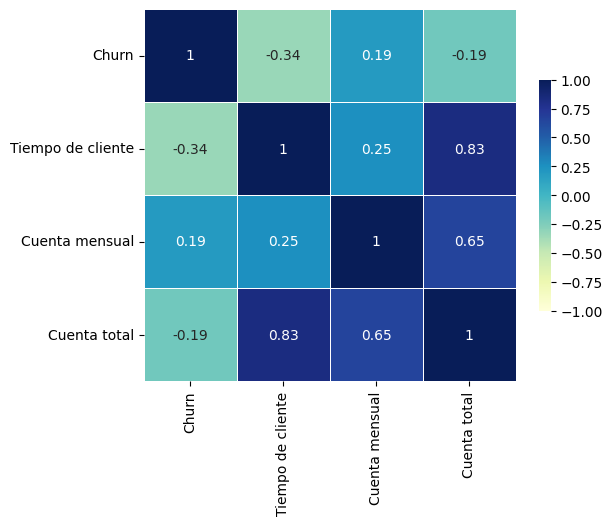

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(
    np.round(corr_num, 2),
    vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5,
    annot=True, cbar_kws={"shrink": .5},
    cmap="YlGnBu")

plt.show()



###Eliminación de columnas

Hemos descartado las columnas que no aportan información relevante para entrenar nuestro modelo, tomando como referencia el análisis de correlación realizado previamente.

In [17]:
df = df.drop(['customerID', 'Cuenta mensual', 'Cuenta diaria'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Churn                       7267 non-null   bool   
 1   Genero                      7267 non-null   object 
 2   Mayor a 65 Años             7267 non-null   bool   
 3   Casad@                      7267 non-null   bool   
 4   Dependientes                7267 non-null   bool   
 5   Tiempo de cliente           7267 non-null   int64  
 6   Servicio de telefonia       7267 non-null   bool   
 7   Multiples lineas            7267 non-null   bool   
 8   Servicio de Internet        7267 non-null   object 
 9   Seguridad en linea          7267 non-null   bool   
 10  Respaldo en linea           7267 non-null   bool   
 11  Proteccion del dispositivo  7267 non-null   bool   
 12  Soporte Premium             7267 non-null   bool   
 13  Suscripción por cable       7267 

##Análisis guiado

/tmp/ipython-input-3482064613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cuenta total', y='Churn', orient='h', palette="YlGnBu")


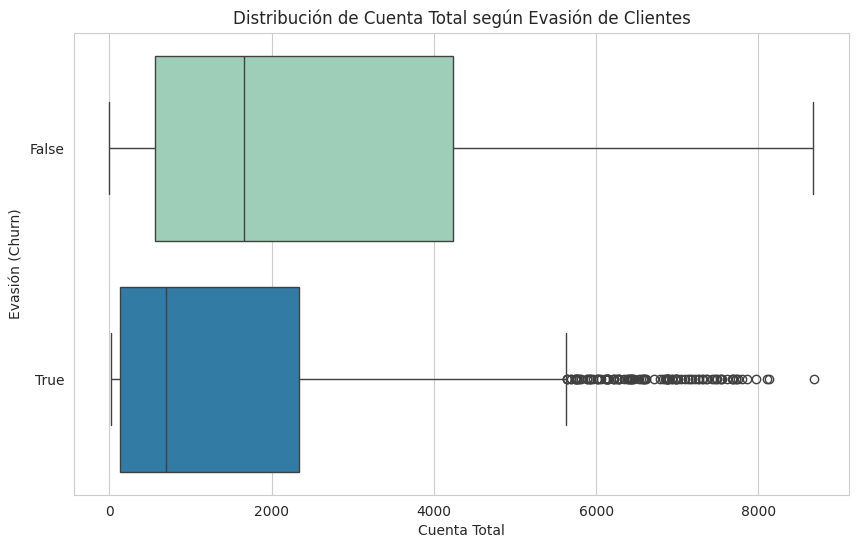

In [20]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cuenta total', y='Churn', orient='h', palette="YlGnBu")
plt.title("Distribución de Cuenta Total según Evasión de Clientes")
plt.xlabel("Cuenta Total")
plt.ylabel("Evasión (Churn)")
plt.show()

/tmp/ipython-input-2376847910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tiempo de cliente', y='Churn', orient='h', palette="YlGnBu")


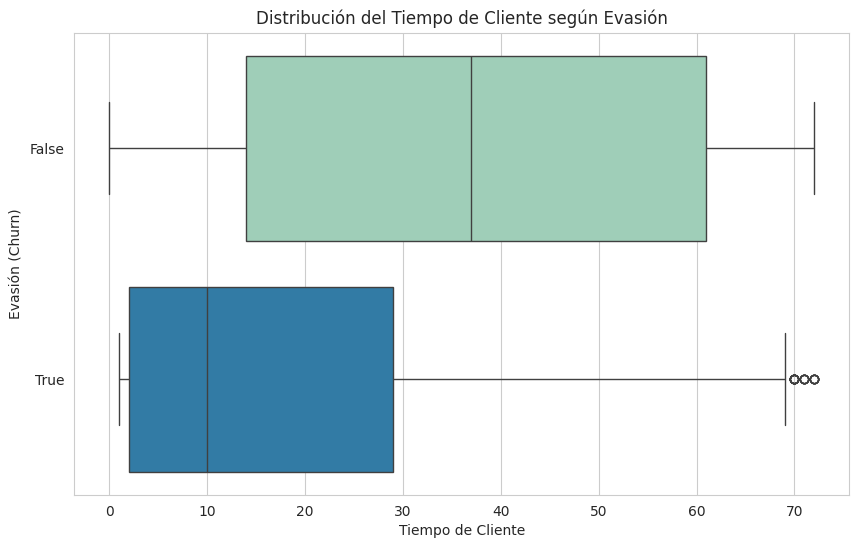

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Tiempo de cliente', y='Churn', orient='h', palette="YlGnBu")
plt.title("Distribución del Tiempo de Cliente según Evasión")
plt.xlabel("Tiempo de Cliente")
plt.ylabel("Evasión (Churn)")
plt.show()

##Codificando variables categoricas

Vamos a transformar las variables categóricas en un formato numérico, preparándolas para que puedan ser utilizadas en el entrenamiento de nuestro modelo de aprendizaje automático.

In [22]:
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

# Lista de variables categóricas a codificar
categoricas = ['Genero', 'Mayor a 65 Años', 'Casad@', 'Dependientes', 'Servicio de telefonia',
               'Multiples lineas', 'Servicio de Internet', 'Seguridad en linea', 'Respaldo en linea',
               'Proteccion del dispositivo', 'Soporte Premium', 'Suscripción por cable', 'Streaming Peliculas',
               'Tipo de contrato', 'Facturacion en linea', 'Forma de pago']


# Crear transformador que aplica OneHotEncoder a las variables categóricas
# drop='if_binary' evita multicolinealidad en variables binarias
# remainder='passthrough' mantiene las demás columnas sin cambios
# sparse_threshold=0 asegura que el resultado sea un array denso en lugar de sparse
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), categoricas),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)


In [28]:
columnas = X.columns
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Genero_male',
       'onehotencoder__Mayor a 65 Años_True',
       'onehotencoder__Casad@_True', 'onehotencoder__Dependientes_True',
       'onehotencoder__Servicio de telefonia_True',
       'onehotencoder__Multiples lineas_True',
       'onehotencoder__Servicio de Internet_dsl',
       'onehotencoder__Servicio de Internet_fiber optic',
       'onehotencoder__Servicio de Internet_no',
       'onehotencoder__Seguridad en linea_True',
       'onehotencoder__Respaldo en linea_True',
       'onehotencoder__Proteccion del dispositivo_True',
       'onehotencoder__Soporte Premium_True',
       'onehotencoder__Suscripción por cable_True',
       'onehotencoder__Streaming Peliculas_True',
       'onehotencoder__Tipo de contrato_month-to-month',
       'onehotencoder__Tipo de contrato_one year',
       'onehotencoder__Tipo de contrato_two year',
       'onehotencoder__Facturacion en linea_True',
       'onehotencoder__Forma de pago_bank transfer (automatic)',
       'one

In [29]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

##Separando datos

Ahora separamos los datos entre el conjunto de prueba y el conjunto de entrenamiento.



In [31]:
from sklearn.model_selection import train_test_split

# 1️⃣ Separar test (20%) y resto (80%)
X_rest, X_test, y_rest, y_test = train_test_split(
    X, y, test_size=0.2, random_state=785, stratify=y
)

# 2️⃣ Separar train (80% del 80% = 64%) y validation (20% del 80% = 16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_rest, y_rest, test_size=0.2, random_state=785, stratify=y_rest
)

# Verificar tamaños
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (3720, 25), Validation: (930, 25), Test: (1163, 25)


In [46]:
from sklearn.model_selection import train_test_split as ttt

X, X_test, y, y_test = ttt(X, y, test_size=0.2, random_state=785, stratify=y)
X_train, X_val, y_train, y_val = ttt(X,y,stratify=y,random_state=785)

###Creando modelo Baseline

Con este modelo tendremos un punto de partida en los modelos futuros

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Crear el modelo "tonto"
dummy = DummyClassifier(strategy="most_frequent")  # predice siempre la clase mayoritaria
dummy.fit(X_train, y_train)

# Predecir sobre el conjunto de test
y_pred_dummy = dummy.predict(X_test)

# Evaluar desempeño
accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Precisión del Dummy Classifier: {accuracy:.4f}")


Precisión del Dummy Classifier: 0.7429


###Creando datos normalizados, y con estrategias de OVERSAMPLING y UNDERSAMPLING

Preparando los datos normalizados y aplicando estrategias de sobremuestreo y submuestreo

Vamos a generar diferentes conjuntos de datos para entrenar y evaluar los modelos, con el objetivo de determinar cuál funciona mejor para la empresa.

Se crean distintos grupos de datos aplicando técnicas como oversampling, undersampling y normalización. Esto nos permite tener los datos listos para probar cualquier modelo y así identificar cuál ofrece los mejores resultados para la toma de decisiones del negocio.

Además, normalizamos los datos para modelos sensibles a la escala de las variables, como KNN. Esta normalización no afecta a modelos como Decision Trees, que no se ven influenciados por la escala de los datos.

In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier


# --- Oversampling con SMOTE ---
oversampling = SMOTE()
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train)
X_smote, y_smote = oversampling.fit_resample(X, y)

# --- Undersampling con NearMiss ---
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
X_Nearmiss, y_Nearmiss = nearmiss.fit_resample(X, y)

# --- Normalización con MinMaxScaler ---
scaler = MinMaxScaler()

X_normalizado = scaler.fit_transform(X)
X_normalizado_smote = scaler.fit_transform(X_smote)
X_normalizado_nearmiss = scaler.fit_transform(X_Nearmiss)

X_train_normalizado = scaler.fit_transform(X_train)
X_val_normalizado = scaler.fit_transform(X_val)
X_test_normalizado = scaler.fit_transform(X_test)

X_train_normalizado_smote = scaler.fit_transform(X_train_smote)
X_train_normalizado_nearmiss = scaler.fit_transform(X_train_nearmiss)


In [49]:
# Crear el clasificador de referencia
dummy = DummyClassifier(strategy="most_frequent")  # Predice siempre la clase mayoritaria

# Entrenar con los datos oversampleados (SMOTE)
dummy.fit(X_train_smote, y_train_smote)

# Evaluar en los datos de prueba originales
score = dummy.score(X_test, y_test)
print(f"Precisión del Dummy Classifier: {score:.4f}")

Precisión del Dummy Classifier: 0.7429


###Creación y validación de modelos
Ahora creamos distintos modelos, con el fin de comparar los distintos rendimientos de cada modelo, para elegir el mejor modelo.

In [50]:
from sklearn.model_selection import StratifiedKFold, cross_validate

def val_cros (modelo,X_cros,y_cros):
  skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=785)
  cv_resultados = cross_validate(modelo,X_cros,y_cros,cv=skf,scoring='recall')
  return cv_resultados

def intervalo_confianza (resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std}, {min(promedio+2*desvio_std,1)}]'


###Modelo de árbol
Entrenamiento de modelo de árbol sin balanceo de datos

In [51]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=785, max_depth=6)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=785)

In [52]:
modelo_arbol.score(X_val,y_val)

0.7695614789337919

In [53]:
val_cros(modelo_arbol,X,y)

{'fit_time': array([0.00981331, 0.00954795, 0.00902009, 0.00874925, 0.00874448]),
 'score_time': array([0.00259566, 0.00220084, 0.0022018 , 0.00217557, 0.00227141]),
 'test_score': array([0.43933054, 0.41004184, 0.42677824, 0.52301255, 0.475     ])}

In [54]:
intervalo_confianza(val_cros(modelo_arbol,X,y))

'El intervalo de confianza es: [0.3743898477817635, 0.5352754241847637]'

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def matriz_confusion (modelo,X_val):
  y_previsto = modelo.predict(X_val)
  matr_conf = confusion_matrix(y_val,y_previsto)
  visualizacion = ConfusionMatrixDisplay(confusion_matrix=matr_conf,display_labels=['No cancela', 'Cancela'])
  visualizacion.plot();


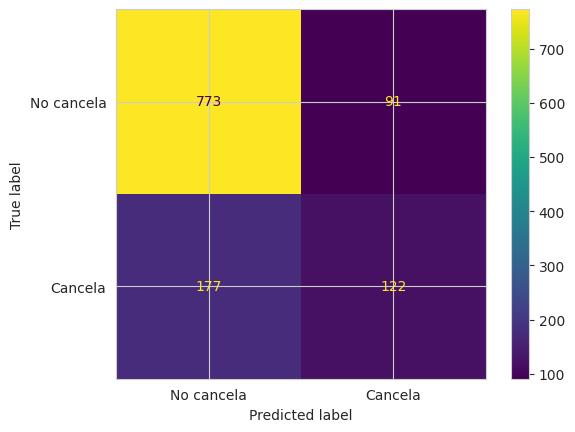

In [56]:

matriz_confusion(modelo_arbol,X_val)

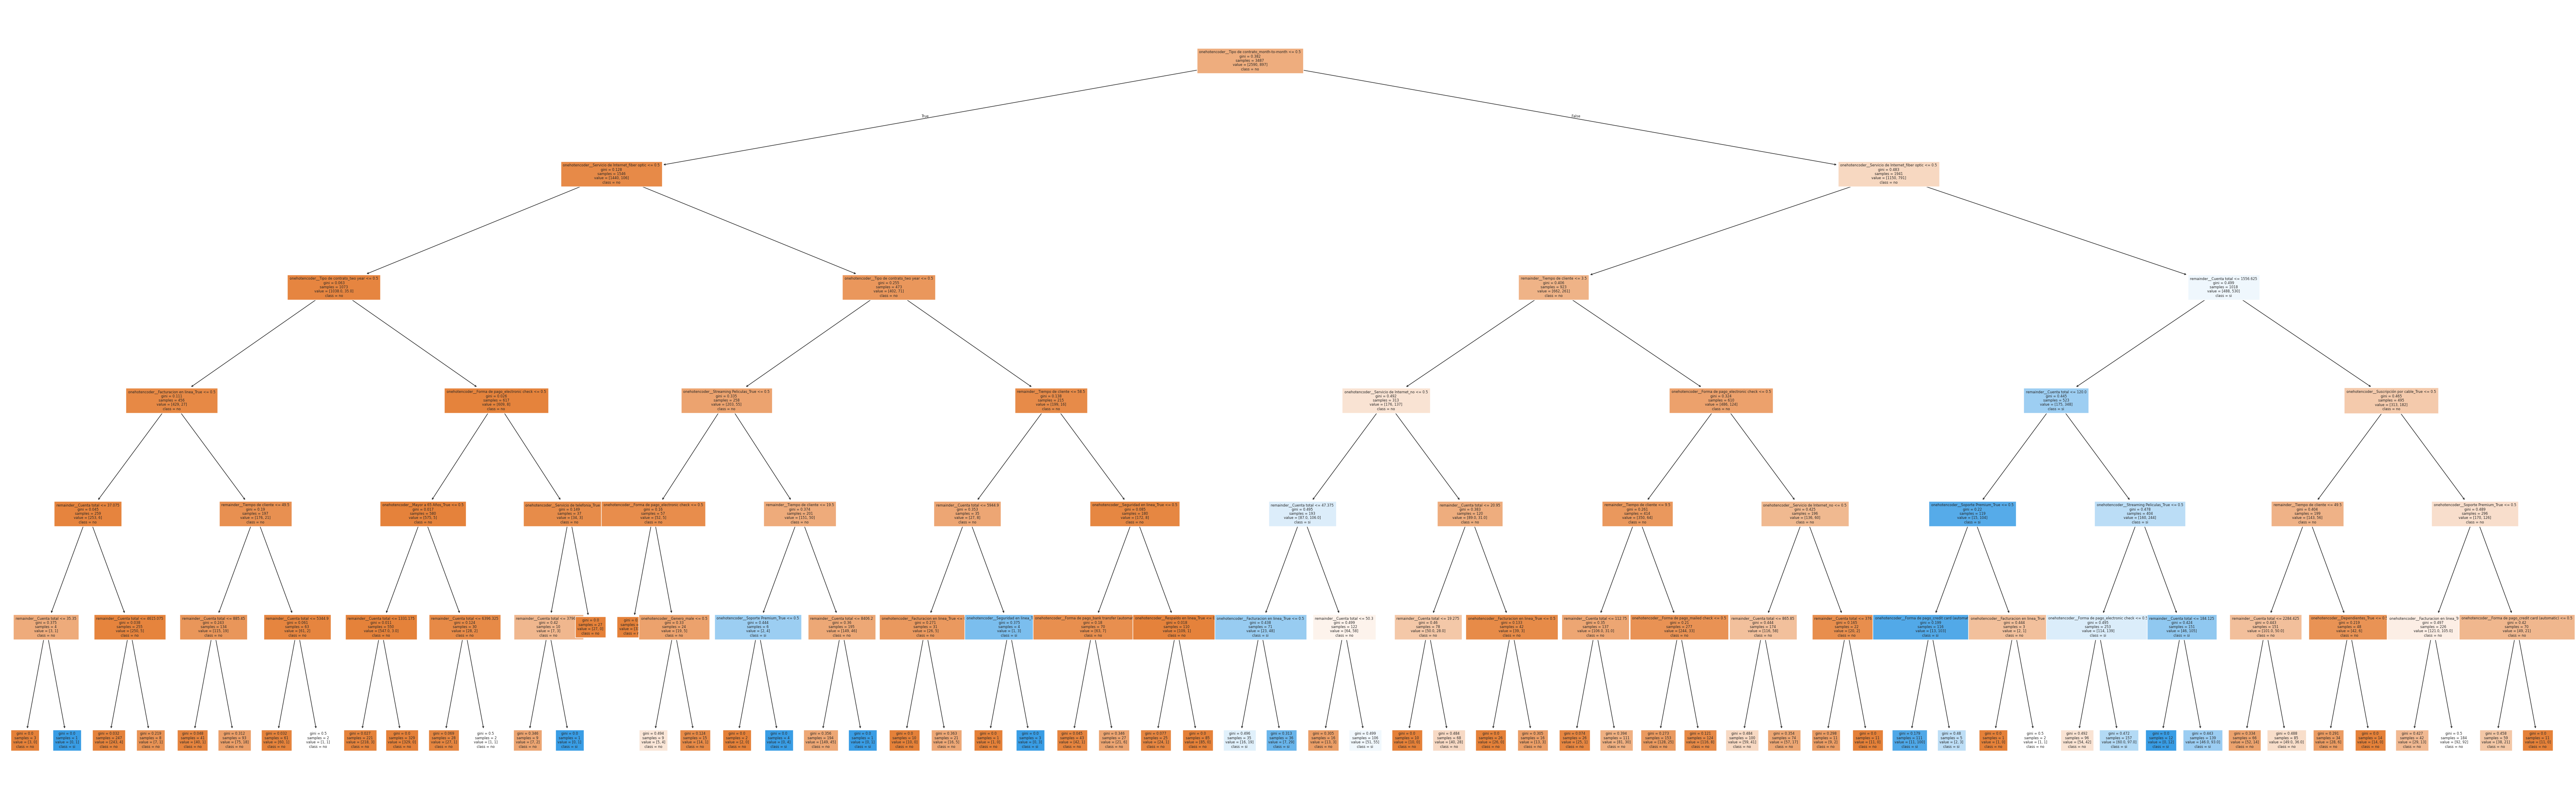

In [57]:
from sklearn.tree import plot_tree

valores_columnas = one_hot.get_feature_names_out()

plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

In [58]:
modelo_arbol_smote = DecisionTreeClassifier(random_state=785, max_depth=6)
modelo_arbol_smote.fit(X_train_smote,y_train_smote)


DecisionTreeClassifier(max_depth=6, random_state=785)

###Modelo KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_normalizado,y_train)
knn.score(X_val_normalizado,y_val)

0.7515047291487532

In [60]:
val_cros(knn,X_normalizado,y)

{'fit_time': array([0.00105667, 0.00094771, 0.0012362 , 0.00148392, 0.00112224]),
 'score_time': array([0.02926636, 0.02834845, 0.0289762 , 0.02948952, 0.03508687]),
 'test_score': array([0.49372385, 0.47698745, 0.48953975, 0.48953975, 0.47083333])}

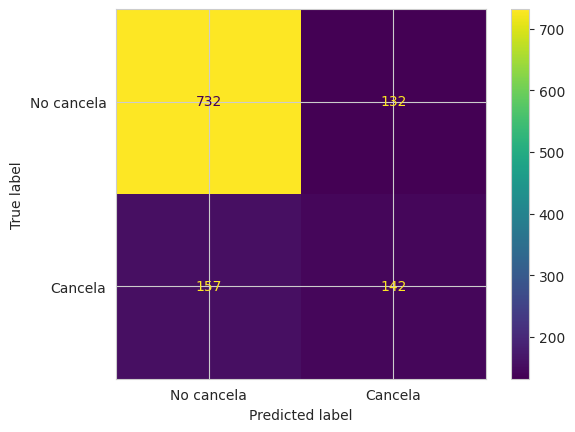

In [61]:
matriz_confusion(knn,X_val_normalizado)

###Importancia de las variables
Realizamos un análisis de la importancia de las variables según cada modelo

In [62]:
def importancia_variables(modelo):
  modelo_importances = modelo.feature_importances_
  return pd.DataFrame({'Features': one_hot.get_feature_names_out(columnas), 'Importances': (modelo_importances*100).round(2)}).sort_values('Importances', ascending=False)


In [63]:
importancia_variables(modelo_arbol)


,Features,Importances
15,onehotencoder__Tipo de contrato_month-to-month,43.04
24,remainder__Cuenta total,20.45
7,onehotencoder__Servicio de Internet_fiber optic,13.89
23,remainder__Tiempo de cliente,7.21
8,onehotencoder__Servicio de Internet_no,3.22
21,onehotencoder__Forma de pago_electronic check,2.51
18,onehotencoder__Facturacion en linea_True,1.80
12,onehotencoder__Soporte Premium_True,1.60
14,onehotencoder__Streaming Peliculas_True,1.38
17,onehotencoder__Tipo de contrato_two year,1.23


In [64]:
importancia_variables(modelo_arbol_smote)


,Features,Importances
15,onehotencoder__Tipo de contrato_month-to-month,51.79
21,onehotencoder__Forma de pago_electronic check,19.89
7,onehotencoder__Servicio de Internet_fiber optic,11.95
23,remainder__Tiempo de cliente,5.44
24,remainder__Cuenta total,2.91
16,onehotencoder__Tipo de contrato_one year,2.72
13,onehotencoder__Suscripción por cable_True,1.18
18,onehotencoder__Facturacion en linea_True,1.10
4,onehotencoder__Servicio de telefonia_True,1.03
6,onehotencoder__Servicio de Internet_dsl,0.79


In [67]:
def importancia_variables_log(modelo):
  coef_log = pd.Series(modelo.coef_[0], index=one_hot.get_feature_names_out(columnas))
  coef_log.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Importancia de variables - Regresión Logística')


###INFORME
####Conclusiones
✅ Se sugiere utilizar el modelo principal (“champion”) para anticipar el comportamiento de los clientes, enfocándose en las variables más relevantes identificadas en los modelos probados: Tiempo como cliente, Tipo de contrato y Cuenta total. Dado que los clientes recientes tienen mayor probabilidad de abandonar la empresa, se proponen las siguientes estrategias:

####🛡️ Recomendaciones Estratégicas

1. Retención de clientes:
Se aconseja ofrecer incentivos para que tanto los clientes nuevos como los actuales opten por contratos a largo plazo, como planes de 12 o 24 meses.

2. Incremento del gasto:
Se recomienda diseñar paquetes promocionales que aumenten el gasto mensual de los clientes. Aquellos que invierten más dinero en la compañía tienden a mostrar menor probabilidad de abandono.

3. Fidelización a largo plazo:
Se sugiere implementar beneficios claros para los clientes con más de un año en la empresa, incentivando que los nuevos clientes permanezcan más tiempo y aumentando la lealtad a largo plazo.